# Backpropagation

## Theory + Math
---

<img src="images/backprop_1.png" width="600" align="center">

<img src="images/backprop_2.png" width="600" align="center">

**Intuition**: FFNs model complex relationships between input and output variables (**composite function**). Computing gradient of those composite functions analytically is difficult/expensive. Backpropagation algorithm uses chain rule from Calculus to offer a solution.

<img src="images/backpropagation_computational_graph.jpg" width="600" align="center">

## PyTorch Implementation
---

### Key concepts - Variables, functionals, Autograd

**TODO**
- read this blog post and add summery here:
https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd/

In [17]:
import torch

In [18]:
from torch.autograd import Variable

In [20]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
print("x_data: ", x_data)
print("y_data: ", y_data)


x_data:  [1.0, 2.0, 3.0]
y_data:  [2.0, 4.0, 6.0]


In [77]:
# define forward-pass funtion
def forward_pass(x, y):
    y_hat = x * w
    loss = (y_hat - y) * (y_hat - y)
    return y_hat, loss

In [82]:
# learning loop
w_list = []
l_list = []
w_init = 1.0

## initialise weight to 1 and learning rate to 0.01
w = Variable(torch.Tensor([w_init]), requires_grad = True)
ALPHA = 0.01
EPOCH = 100

## prediction before training
print("prediction (before training): ", "x := 4.0", "y_hat :=", forward(4).item() )

for epoch in range(EPOCH):
    for x_val, y_val in zip(x_data, y_data):
        
        # forward pass
        y_hat, loss = forward_pass(x_val, y_val)
        
        # backward pass
        loss.backward()
        
        # update weight - dloss/dw = w.grad.data
        w.data = w.data - ALPHA * w.grad.data

        # capture current (w,l) pair to lists
        w_list.append(round(w.item(), 2))
        l_list.append((loss.data[0].item(), 2))

        # print current interation update
        print("\t", "grad: ", x_val, y_val, round(w.grad.data.item(), 2))
        
        # manually zero the gradients before next epoch
        w.grad.data.zero_()

    # print epoch progress
    print("progress>>>", "epoch: ", epoch, "weight: ", round(w.item(), 2), "loss: ", round(loss.data[0].item(), 2))

## prediction after training
print("prediction (after training)", "x := 4.0", "y_hat :=", round(forward(4).item(), 2))


prediction (before training):  x := 4.0 y_hat := 4.0
	 grad:  1.0 2.0 -2.0
	 grad:  2.0 4.0 -7.84
	 grad:  3.0 6.0 -16.23
progress>>> epoch:  0 weight:  1.26 loss:  7.32
	 grad:  1.0 2.0 -1.48
	 grad:  2.0 4.0 -5.8
	 grad:  3.0 6.0 -12.0
progress>>> epoch:  1 weight:  1.45 loss:  4.0
	 grad:  1.0 2.0 -1.09
	 grad:  2.0 4.0 -4.29
	 grad:  3.0 6.0 -8.87
progress>>> epoch:  2 weight:  1.6 loss:  2.19
	 grad:  1.0 2.0 -0.81
	 grad:  2.0 4.0 -3.17
	 grad:  3.0 6.0 -6.56
progress>>> epoch:  3 weight:  1.7 loss:  1.19
	 grad:  1.0 2.0 -0.6
	 grad:  2.0 4.0 -2.34
	 grad:  3.0 6.0 -4.85
progress>>> epoch:  4 weight:  1.78 loss:  0.65
	 grad:  1.0 2.0 -0.44
	 grad:  2.0 4.0 -1.73
	 grad:  3.0 6.0 -3.58
progress>>> epoch:  5 weight:  1.84 loss:  0.36
	 grad:  1.0 2.0 -0.33
	 grad:  2.0 4.0 -1.28
	 grad:  3.0 6.0 -2.65
progress>>> epoch:  6 weight:  1.88 loss:  0.2
	 grad:  1.0 2.0 -0.24
	 grad:  2.0 4.0 -0.95
	 grad:  3.0 6.0 -1.96
progress>>> epoch:  7 weight:  1.91 loss:  0.11
	 grad:  1.0 2.0 

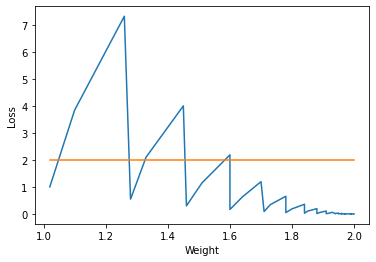

In [83]:
import matplotlib.pyplot as plt
plt.plot(w_list, l_list)
plt.ylabel('Loss')
plt.xlabel('Weight')
plt.show()

As can be seen from the plot our training loop converges to zero loss as weight approaches two.

---